<a href="https://colab.research.google.com/github/GermanOmar/Wear/blob/master/Wear_HV_JMPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A machine learning approach for microhardness prediction and sliding wear evaluation in materials manufactured by laser powder bed fusion

<a href="https://ibb.co/3vvDZtg"><img src="https://i.ibb.co/Nrr8Bwc/Tests2-TIFF.png" WIDTH="620" HEIGHT="360"  border="0"></a>

 Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install lazypredict
warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.2 MB 8.5 MB/s 
     |████████████████████████████████| 25.9 MB 59.4 MB/s 
     |████████████████████████████████| 10.1 MB 20.7 MB/s 
     |████████████████████████████████| 14.5 MB 7.7 kB/s 
     |████████████████████████████████| 248 kB 52.2 MB/s 
     |████████████████████████████████| 302 kB 60.4 MB/s 
     |████████████████████████████████| 269 kB 60.4 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 6.8 MB 16.4 MB/s 
     |████████████████████████████████| 127.6 MB 8.7 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=dca374c5c3b184ced88fdbe620b45d8e47c0be20289ec5216fdaab34bb64275a
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully 

Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

 Upload database:

In [ ]:
!git clone https://github.com/GermanOmar/Wear

Cloning into 'Wear'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [ ]:
#Experimental data
data = pd.read_table('HV2.txt') 
data.describe()


,P,S,L,D,HV
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,193.013699,840.979452,45.684932,5.561233,410.906849
std,108.107906,846.483607,8.948738,2.289946,225.770134
min,80.000000,55.600000,20.000000,2.340000,118.000000
25%,100.000000,250.000000,50.000000,2.590000,188.000000
50%,150.000000,500.000000,50.000000,5.400000,393.200000
75%,280.000000,1000.000000,50.000000,7.800000,540.000000
max,500.000000,5000.000000,50.000000,8.010000,980.300000



Setting inputs - output:

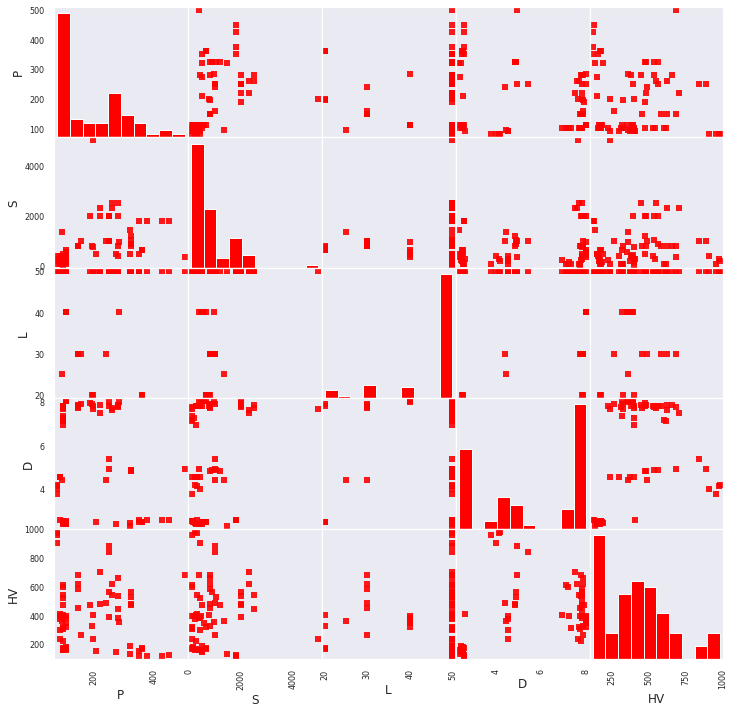

In [ ]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
import seaborn as sns
sns.set()

plt.rcParams["axes.grid"] = False

#pd.tools.plotting.scatter_matrix(df, alpha=0.2, c='red', hist_kwds={'color':['burlywood']})

#scatter_matrix(data, alpha=0.2, marker='s', figsize = (12,12), color = 'blue')
scatter_matrix(data, alpha=0.9,marker='s', figsize = (12,12),  c='red', hist_kwds={'color':['red']})

warnings.filterwarnings("ignore")

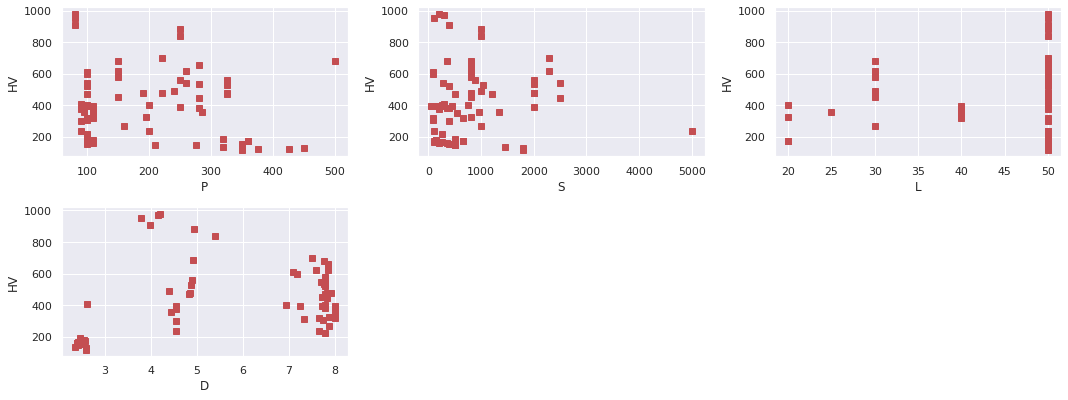

In [ ]:
#fields = ['P', 'S', 'L',  'HD1',  'F', 'd' ]
fields = ['P', 'S', 'L',  'D'  ]
import seaborn as sns
sns.set_theme(style="darkgrid")

fig = plt.figure()
fig.set_size_inches((15,8))
for i, field in enumerate(fields):
  plt.subplot(3, 3, i + 1)
  plt.plot(data[field], data['HV'], 'rs')
  plt.xlabel(field)
  plt.ylabel('HV')

plt.tight_layout()

In [ ]:
#X=data[['P', 'S', 'L',  'HD1',  'F', 'd' ]]
X=data[['P', 'S', 'L',  'D']]
Y=data['HV'][:,None]

# Hardness prediction

 Split data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 58  test samples: 15


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)


###Results:

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:01<00:00, 29.84it/s]


                               Adjusted R-Squared  ...  Time Taken
Model                                              ...            
GradientBoostingRegressor                    0.92  ...        0.06
RandomForestRegressor                        0.88  ...        0.18
BaggingRegressor                             0.85  ...        0.03
XGBRegressor                                 0.84  ...        0.11
AdaBoostRegressor                            0.80  ...        0.08
ExtraTreesRegressor                          0.78  ...        0.10
DecisionTreeRegressor                        0.71  ...        0.01
ExtraTreeRegressor                           0.67  ...        0.01
KNeighborsRegressor                          0.22  ...        0.02
HuberRegressor                              -0.06  ...        0.03
OrthogonalMatchingPursuitCV                 -0.10  ...        0.02
OrthogonalMatchingPursuit                   -0.10  ...        0.01
TransformedTargetRegressor                  -0.11  ...        

### XGB

In [ ]:
import pickle
import xgboost as xgb

xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

-XGBRegressor -
------------------
MSE test: 4103.156492967152

R2:  0.9335709301243099
RMSE:  64.05588570121525
MAE:  42.28572387695312
IM:  76.75443537403164



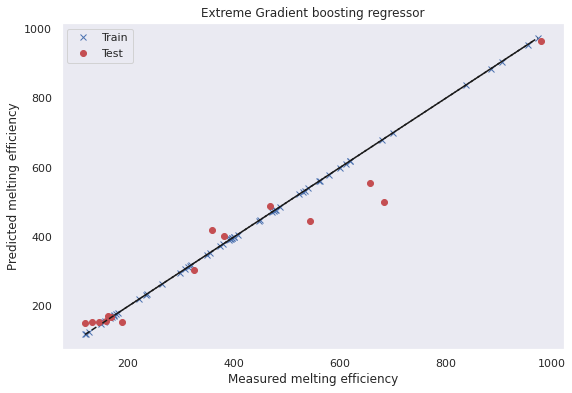

In [ ]:
print("-XGBRegressor -")
print("------------------")
y_star_train = xgbr.predict(X_train)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

#Plots
#sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted melting efficiency')
plt.xlabel('Measured melting efficiency')
plt.title("Extreme Gradient boosting regressor")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

In [ ]:
# initialize model and define the space of the hyperparameters to
# perform the grid-search over
model = xgbr
n_estimators = [10, 100, 1000, 10000]
learning_rate = [0.1, 0.01, 1e-3]
max_depth = [5, 20, 50, 100]
reg_lambda = [0.001, 0.01, 0.1, 1, 10]


grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth )

In [ ]:
# initialize a cross-validation fold and perform a randomized-search
# to tune the hyperparameters
print("[INFO] grid searching over the hyperparameters...")
cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
randomSearch = RandomizedSearchCV(estimator=model, n_jobs=-1,
	cv=cvFold, param_distributions=grid,
	scoring="neg_mean_squared_error")
searchResults = randomSearch.fit(X_train, y_train)
# extract the best model and evaluate it
print("[INFO] evaluating...")
bestModel = searchResults.best_estimator_
print("R2: {:.2f}".format(bestModel.score(X_test, y_test)))
print(bestModel)

[INFO] grid searching over the hyperparameters...
[INFO] evaluating...
R2: 0.18
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=1234, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, seed=1234, silent=None,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=0)


In [ ]:
# get importance

importance = xgbr.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 0, Score: 0.29136
Feature: 1, Score: 0.13245
Feature: 2, Score: 0.04947
Feature: 3, Score: 0.52673


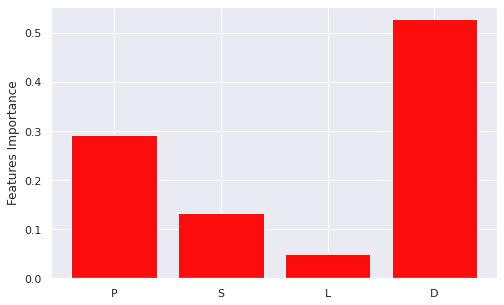

In [ ]:
# Create lists for the plot
import seaborn as sns
sns.set()

#plt.rcParams["axes.grid"] = False

labels = ['P', 'S', 'L',  'D' ]
x_pos = np.arange(len(labels))

fig, ax = plt.subplots()
fig.set_size_inches((8,5))

ax.bar(x_pos, importance, align='center', alpha=0.95, color='red')
ax.set_ylabel('Features Importance')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
#ax.set_title('Features Importance Analysis')
ax.yaxis.grid(True)


## ##GBR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#KERNEL
#GBR=GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR=GradientBoostingRegressor(n_estimators=5000, random_state=42, learning_rate=0.1 )

#START TRAINING
GBR.fit(X_train, y_train)
#PREDICTION
y_pred=GBR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

 
print("-Gradient boosting regressor-")
print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()


-Gradient boosting regressor-
-----------------------------
MSE test: 10973.102041221147

R2:  0.7621263514381786
RMSE:  104.75257534409904
MAE:  76.81526513769423
IM:  129.8989745273922



## ADA

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

print(" AdaBoost -")
print("------------------")

Ada = AdaBoostRegressor(random_state=32, n_estimators=1000)
#START TRAINING
Ada.fit(X_train,y_train)
#PREDICTION
y_pred=Ada.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

 AdaBoost -
------------------
MSE test: 16483.22360089614

R2:  0.6426785677125495
RMSE:  128.38700713427406
MAE:  98.24626833814334
IM:  161.6653349418872



## RFR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#KERNEL
RFR=RandomForestRegressor(n_estimators=2000,max_depth=20)

#START TRAINING
RFR.fit(X_train,y_train)
#PREDICTION
y_pred=RFR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-----------------------------
MSE test: 19226.150822315973

R2:  0.58321770573864
RMSE:  138.65839614792887
MAE:  104.74154666666506
IM:  173.7731743622184



## Comparisson

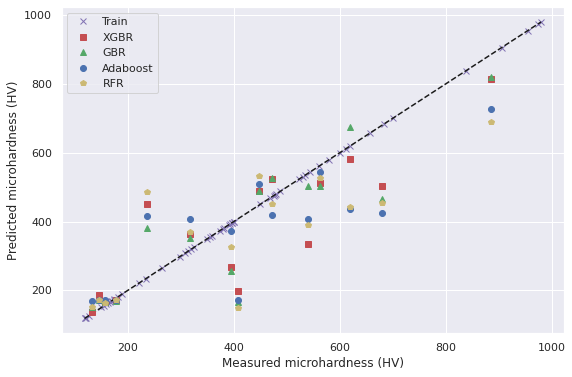

In [ ]:
import seaborn as sns
sns.set()

y1=xgbr.predict(X_test)
y2=GBR.predict(X_test)
y3=Ada.predict(X_test)
y4=RFR.predict(X_test)

#Plots
#sns.set_theme(style="whitegrid")
#sns.set_theme(style="darkgrid")
plt.rcParams["axes.grid"] = True
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'mx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y1, 'rs', label = 'XGBR')
plt.plot(y_test, y2, 'g^', label = 'GBR')
plt.plot(y_test, y3, 'bo', label = 'Adaboost')
plt.plot(y_test, y4, 'yp', label = 'RFR')

plt.legend()
plt.ylabel('Predicted microhardness (HV)')
plt.xlabel('Measured microhardness (HV)')
#plt.title("Machine learning regressors")
print()

### CROSS-VALIDATION

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score as CV

import warnings
warnings.filterwarnings('ignore')

models = [ xgbr,  GBR, Ada, RFR ]
labels = ['XGBR',  'GBR', 'Adaboost', 'RFR']
IMS = []

print("--------------------------------------------------------------")
print("%5s | %5s | %5s | %5s | %5s " % ("ML algorithm",  "CV-R2", "CV-MSE", "CV-MAE", "IM"))
print("--------------------------------------------------------------")

for mod, label in zip( models, labels): 
  #y_star = mod.predict(X)
 
  scoreR2 = CV(mod, X_train, y_train, cv=5, scoring='r2')
  #print(-1*scoreR2)
  scoreMSE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  #print(-1*scoreMSE)
  scoreMAE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
  #print(-1*scoreMAE)
  IM=np.sqrt(((1-scoreR2)**2) + (scoreMSE) + (scoreMAE**2) )
  #print("IM: ", IM)
  
 
  print("%15s | %.4f | %.4f | %.4f | %.4f " % (label,  scoreR2.mean(), -1*scoreMSE.mean(), -1*scoreMAE.mean() , np.sqrt(((1-scoreR2.mean())**2) + (-1*scoreMSE.mean()) + (scoreMAE.mean()**2) )))
print("--------------------------------------------------------------")

--------------------------------------------------------------
ML algorithm | CV-R2 | CV-MSE | CV-MAE |    IM 
--------------------------------------------------------------
           XGBR | 0.6273 | 17196.4900 | 87.1912 | 157.4768 
            GBR | 0.6467 | 16060.2211 | 87.2538 | 153.8622 
       Adaboost | 0.6824 | 13923.6081 | 83.8577 | 144.7612 
            RFR | 0.7046 | 13857.6553 | 80.6745 | 142.7099 
--------------------------------------------------------------


# Wear evaluation

In [ ]:
#Experimental data
data = pd.read_table('wear.txt') 
data.describe()

,LP,SS,LT,RD,HBM,HCB,F,D,w,K
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,173.870968,591.895161,44.354839,5.762581,439.427419,1229.274194,9.653226,158.173042,2.880145,10.420758
std,117.910147,523.769677,8.419526,2.167730,218.076880,645.368878,14.458870,76.361416,3.321766,11.435778
min,25.000000,55.600000,20.000000,2.400000,145.000000,600.000000,3.000000,70.371675,0.003000,0.014000
25%,100.000000,200.000000,40.000000,4.342500,309.250000,746.000000,3.000000,105.557513,0.429750,1.168500
50%,110.000000,400.000000,50.000000,4.990000,399.500000,830.000000,4.950000,133.203529,1.470000,7.363000
75%,247.500000,800.000000,50.000000,7.872500,538.500000,1601.500000,5.750000,211.115026,4.391750,14.517750
max,800.000000,2000.000000,50.000000,8.010000,980.300000,2800.000000,50.000000,592.500000,11.900000,48.305000


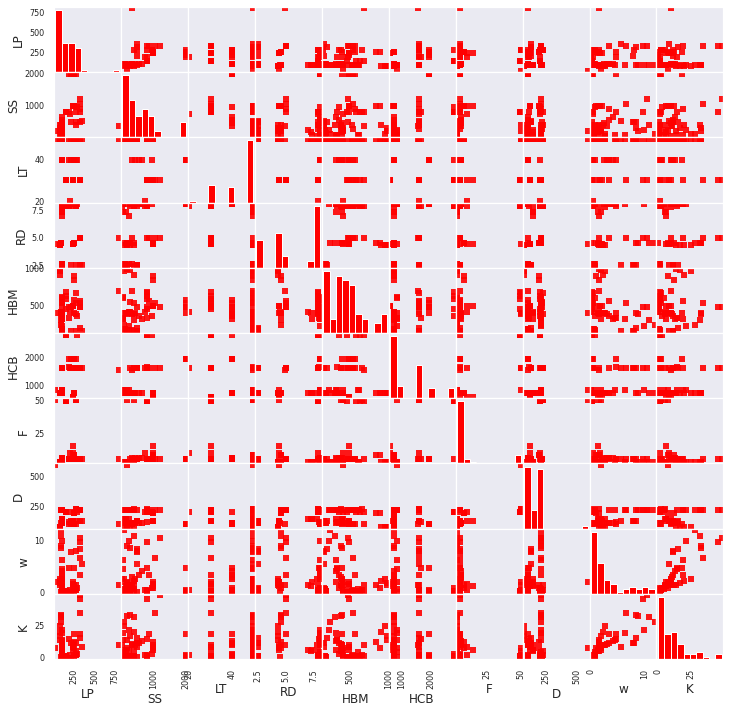

In [ ]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
import seaborn as sns
sns.set()

plt.rcParams["axes.grid"] = False

#pd.tools.plotting.scatter_matrix(df, alpha=0.2, c='red', hist_kwds={'color':['burlywood']})

#scatter_matrix(data, alpha=0.2, marker='s', figsize = (12,12), color = 'blue')
scatter_matrix(data, alpha=0.9,marker='s', figsize = (12,12),  c='red', hist_kwds={'color':['red']})

warnings.filterwarnings("ignore")

No handles with labels found to put in legend.


Text(0.5, 0, 'Wear rate')

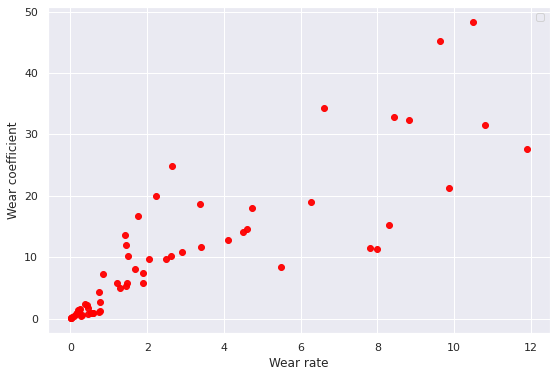

In [ ]:
#Plots
#sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = True
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(data['w'], data['K'], alpha=0.95, color='red',  marker='o', linestyle='None')

plt.legend()
plt.ylabel('Wear coefficient')
plt.xlabel('Wear rate')


In [ ]:
X=data[['LP', 'SS', 'LT',  'RD', 'HBM', 'HCB', 'F','D', 'w']]
Y=data['K'][:,None]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 49  test samples: 13


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:01<00:00, 29.82it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.87       0.97  2.21        0.11
GradientBoostingRegressor                    0.83       0.96  2.59        0.07
XGBRegressor                                 0.72       0.93  3.29        0.04
AdaBoostRegressor                            0.72       0.93  3.29        0.08
DecisionTreeRegressor                        0.65       0.91  3.71        0.01
RandomForestRegressor                        0.52       0.88  4.32        0.19
BaggingRegressor                             0.50       0.88  4.40        0.03
PoissonRegressor                             0.28       0.82  5.30        0.01
SGDRegressor                                 0.26       0.82  5.35        0.01
LassoLarsCV                                  0.26       0.82  5.35        0.03
LarsCV                                       0.26   

XGBR

In [ ]:
import pickle
import xgboost as xgb

xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=40,
             min_child_weight=1,  monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

In [ ]:
print("-XGBRegressor -")
print("------------------")
y_star_train = xgbr.predict(X_train)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-XGBRegressor -
------------------
MSE test: 7.449781267041502

R2:  0.9520405625820793
RMSE:  2.7294287437193705
MAE:  2.260113185827549
IM:  3.5440362565062022



Random search optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

In [ ]:
# initialize model and define the space of the hyperparameters to
# perform the grid-search over
model = xgbr
n_estimators = [10, 100, 1000, 10000]
learning_rate = [0.1, 0.01, 1e-3]
max_depth = [5, 10, 20, 40]
reg_lambda = [0.01, 0.1, 1]


grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth )

In [ ]:
# initialize a cross-validation fold and perform a randomized-search
# to tune the hyperparameters
print("[INFO] grid searching over the hyperparameters...")
cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
randomSearch = RandomizedSearchCV(estimator=model, n_jobs=-1,
	cv=cvFold, param_distributions=grid,
	scoring="neg_mean_squared_error")
searchResults = randomSearch.fit(X_train, y_train)
# extract the best model and evaluate it
print("[INFO] evaluating...")
bestModel = searchResults.best_estimator_
print("R2: {:.2f}".format(bestModel.score(X_test, y_test)))
print(bestModel)

[INFO] grid searching over the hyperparameters...
[INFO] evaluating...
R2: 0.95
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=40,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)


In [ ]:
# get importance

importance = xgbr.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 0, Score: 0.01047
Feature: 1, Score: 0.00175
Feature: 2, Score: 0.00006
Feature: 3, Score: 0.13450
Feature: 4, Score: 0.04362
Feature: 5, Score: 0.00019
Feature: 6, Score: 0.00102
Feature: 7, Score: 0.19690
Feature: 8, Score: 0.61149


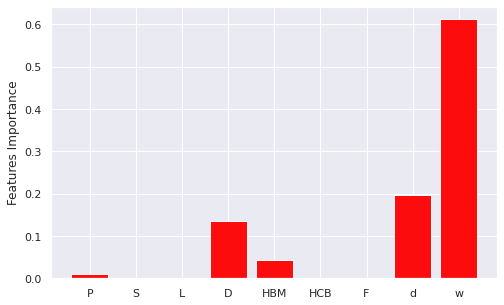

In [ ]:
# Create lists for the plot
import seaborn as sns
sns.set()

#plt.rcParams["axes.grid"] = False

labels = ['P', 'S', 'L',  'D', 'HBM', 'HCB', 'F','d', 'w']
#labels = [ 'HBM', 'HCB', 'F','D','K' ]
x_pos = np.arange(len(labels))


fig, ax = plt.subplots()
fig.set_size_inches((8,5))

ax.bar(x_pos, importance, align='center', alpha=0.95, color='red')
ax.set_ylabel('Features Importance')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
#ax.set_title('Features Importance Analysis')
ax.yaxis.grid(True)

GBR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#KERNEL
#GBR=GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR=GradientBoostingRegressor(n_estimators=5000, random_state=42, learning_rate=0.1 )

#START TRAINING
GBR.fit(X_train, y_train)
#PREDICTION
y_pred=GBR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

 
print("-Gradient boosting regressor-")
print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-Gradient boosting regressor-
-----------------------------
MSE test: 6.707872794269478

R2:  0.9568167448207647
RMSE:  2.589956137518448
MAE:  2.094255937426088
IM:  3.331012686742843



AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

print(" AdaBoost -")
print("------------------")

Ada = AdaBoostRegressor(random_state=32, n_estimators=1000)
#START TRAINING
Ada.fit(X_train,y_train)
#PREDICTION
y_pred=Ada.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

 AdaBoost -
------------------
MSE test: 9.799983574842042

R2:  0.9369106713194899
RMSE:  3.1304925450864824
MAE:  2.793970085470085
IM:  4.196454774775622



GPR

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
 
GP=GPR(alpha=0.001, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=40, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=1234)
 
#Training
GP.fit(X_train,y_train)
 
#Testing
y_star_train = GP.predict(X_train)
y_pred = GP.predict(X_test)
 
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test, y_pred)
MSE_train = mean_squared_error(y_train, y_star_train)
 
print("Gaussian Process")
print('MSE train:', MSE_train)
print('MSE test:', MSE_test)
print("MSE train < MSE test?", MSE_train < MSE_test)
print()
from sklearn.metrics import r2_score
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)
R2_test=r2_score(y_test, y_pred)
print('R2_test: ',R2_test)
print()
""" 
RE=100 * abs(y_test - y_pred) / y_test
print('Relative error (%): ',RE)
"""
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 
#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

Gaussian Process
MSE train: 0.006993464484704267
MSE test: 0.5985730414165049
MSE train < MSE test? True

R2_train:  0.9999388436320826
R2_test:  0.9961465678936277

R2:  0.9961465678936277
RMSE:  0.7736750231308395
MAE:  0.5345789788727899
IM:  0.9404055375252627



C-V

In [ ]:
import seaborn as sns
sns.set()

y1=xgbr.predict(X_test)
y2=GBR.predict(X_test)
y3=Ada.predict(X_test)
y4=GP.predict(X_test)
#Plots
#sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = True
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'yx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y1, 'rs', label = 'XGBR')
plt.plot(y_test, y2, 'g^', label = 'GBR')
plt.plot(y_test, y3, 'bo', label = 'Adaboost')
plt.plot(y_test, y4, 'm*', label = 'Gaussian')


plt.legend()
plt.ylabel('Predicted wear coefficient')
plt.xlabel('Measured wear coefficient')
#plt.title("Machine learning regressors")
print()

ValueError: ignored

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score as CV

import warnings
warnings.filterwarnings('ignore')

models = [ xgbr,  GBR, Ada, GP ]
labels = ['XGBR',  'GBR', 'Adaboost', 'GPR']
IMS = []

print("--------------------------------------------------------------")
print("%5s | %5s | %5s | %5s | %5s " % ("ML algorithm",  "CV-R2", "CV-MSE", "CV-MAE", "IM"))
print("--------------------------------------------------------------")

for mod, label in zip( models, labels): 
  #y_star = mod.predict(X)
 
  scoreR2 = CV(mod, X_train, y_train, cv=5, scoring='r2')
  #print(-1*scoreR2)
  scoreMSE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  #print(-1*scoreMSE)
  scoreMAE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
  #print(-1*scoreMAE)
  IM=np.sqrt(((1-scoreR2)**2) + (scoreMSE) + (scoreMAE**2) )
  #print("IM: ", IM)
  
 
  print("%15s | %.4f | %.4f | %.4f | %.4f " % (label,  scoreR2.mean(), -1*scoreMSE.mean(), -1*scoreMAE.mean() , np.sqrt(((1-scoreR2.mean())**2) + (-1*scoreMSE.mean()) + (scoreMAE.mean()**2) )))
print("--------------------------------------------------------------")

--------------------------------------------------------------
ML algorithm | CV-R2 | CV-MSE | CV-MAE |    IM 
--------------------------------------------------------------
           XGBR | 0.7657 | 22.3727 | 2.6934 | 5.4481 
            GBR | 0.8116 | 18.8794 | 2.3829 | 4.9591 
       Adaboost | 0.8022 | 20.0517 | 2.7945 | 5.2820 
            GPR | 0.9618 | 3.7952 | 1.0432 | 2.2102 
--------------------------------------------------------------


## Uncertainty quantification

Gaussian Process
MSE train: 0.006993464484704267
MSE test: 0.5985730414165049
MSE train < MSE test? True

R2_train:  0.9999388436320826
R2_test:  0.9961465678936277

R2:  0.9961465678936277
RMSE:  0.7736750231308395
MAE:  0.5345789788727899
IM:  0.9404055375252627



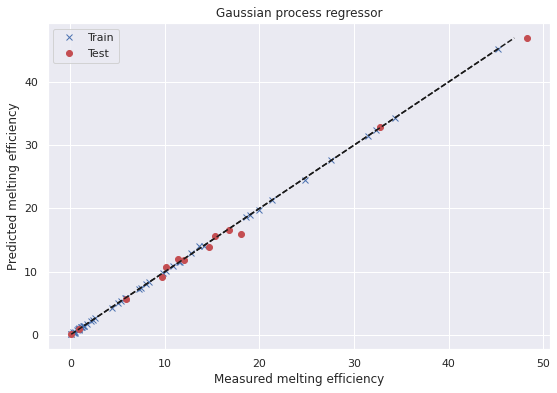

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
 
GP=GPR(alpha=0.001, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=40, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=1234)
 
#Training
GP.fit(X_train,y_train)
 
#Testing
y_star_train = GP.predict(X_train)
y_pred = GP.predict(X_test)
 
#Plots
sns.set_theme(style="darkgrid")
plt.rcParams["axes.grid"] = True
fig = plt.figure()
fig.set_size_inches((9,6))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted melting efficiency')
plt.xlabel('Measured melting efficiency')
plt.title("Gaussian process regressor")
 
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test, y_pred)
MSE_train = mean_squared_error(y_train, y_star_train)
 
print("Gaussian Process")
print('MSE train:', MSE_train)
print('MSE test:', MSE_test)
print("MSE train < MSE test?", MSE_train < MSE_test)
print()
from sklearn.metrics import r2_score
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)
R2_test=r2_score(y_test, y_pred)
print('R2_test: ',R2_test)
print()
""" 
RE=100 * abs(y_test - y_pred) / y_test
print('Relative error (%): ',RE)
"""
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 
#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

In [ ]:
X=data['w'][:,None]
Y=data['K'][:,None]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 49  test samples: 13


Analitical model

Text(0, 0.5, 'Wear coefficient')

<Figure size 432x288 with 0 Axes>

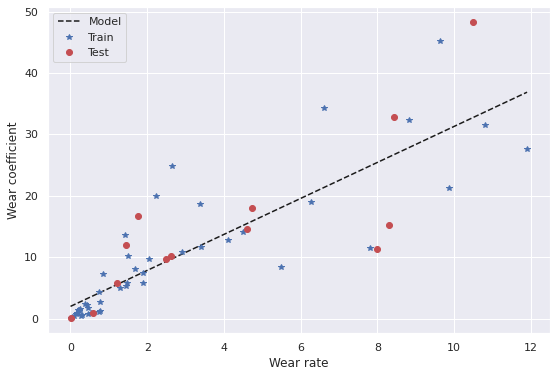

In [ ]:
def f(x):
  return  2.9321*x + 1.9759

Xs = np.linspace(0.003,11.9,30)
Ys=f(Xs)
plt.figure()
plt.figure(figsize =(9, 6))
plt.plot(Xs, Ys, 'k--',  label = 'Model')
plt.plot(X_train, y_train, 'b*', label = 'Train')
plt.plot(X_test, y_test, 'ro', label = 'Test')
plt.legend()
plt.xlabel('Wear rate')
plt.ylabel('Wear coefficient')

<Figure size 432x288 with 0 Axes>

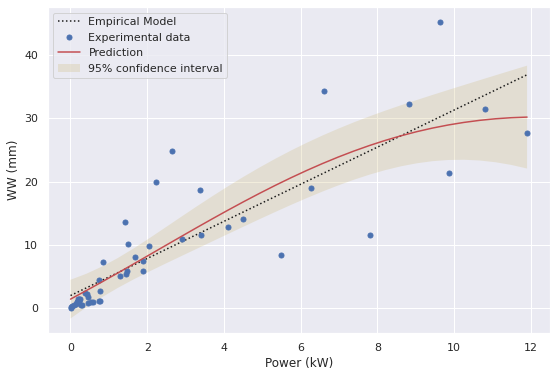

In [ ]:
#Tunning hiperparameters (Training data)
def f(x):
  return 2.9321*x + 1.9759

X1 = np.asarray(X_train)
y1 = np.asarray(y_train).ravel()

x1 = np.atleast_2d(np.linspace(0.003,11.9,30)).T

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-3, 1e3))
model = GPR(kernel=kernel, n_restarts_optimizer=8, alpha=0.5, normalize_y=True)

model.fit(X1, y1)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = model.predict(x1, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
plt.figure()
plt.figure(figsize =(9, 6)) 
plt.plot(x1, f(x1), 'k:', label=r'Empirical Model')
plt.plot(X1, y1, 'b.', markersize=10, label='Experimental data')
plt.plot(x1, y_pred, 'r-', label='Prediction')
plt.fill(np.concatenate([x1, x1[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.25, fc='y', ec='None', label='95% confidence interval')
plt.xlabel('Power (kW)')
plt.ylabel('WW (mm)')
plt.legend(loc='upper left')

<Figure size 432x288 with 0 Axes>

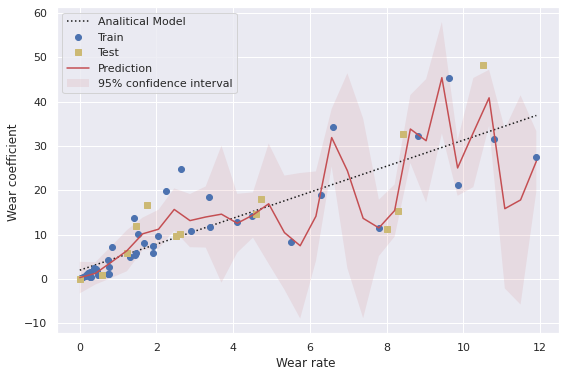

In [ ]:
#Tunning hiperparameters (Testing data)
def f(x):
  return 2.9321*x + 1.9759

X2 = np.asarray(X)
y2 = np.asarray(Y).ravel()

x2 = np.atleast_2d(np.linspace(0.003,11.9,30)).T

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-3, 1e3))
model = GPR(kernel=kernel, n_restarts_optimizer=8, alpha=0.1, normalize_y=True)

model.fit(X2, y2)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = model.predict(x2, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
plt.figure()
plt.figure(figsize =(9, 6)) 
plt.plot(x2, f(x2), 'k:', label=r'Analitical Model')
plt.plot(X_train, y_train, 'bo', label = 'Train')
plt.plot(X_test, y_test, 'ys', label = 'Test')
plt.plot(x2, y_pred, 'r-' , label='Prediction')
plt.fill(np.concatenate([x2, x2[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.1, fc='r', ec='None', label='95% confidence interval')
plt.xlabel('Wear rate ')
plt.ylabel('Wear coefficient ')
plt.legend(loc='upper left')